In [104]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [105]:

data_cars = pd.read_csv('cars.csv')
#data_cars

In [106]:
all_cars = len(data_cars)
# Ilosc samochodow

In [107]:
all_cars_zero = len(data_cars[data_cars.ElectricRange == 0])
# Ilosc samochodow z 0 zasiegiem

In [108]:
zerowy_zasieg = all_cars_zero/all_cars*100
zerowy_zasieg
# Taki procent samochodow ma nie podany zasieg

36.339441535776615

array([[<AxesSubplot: title={'center': 'ElectricRange'}>]], dtype=object)

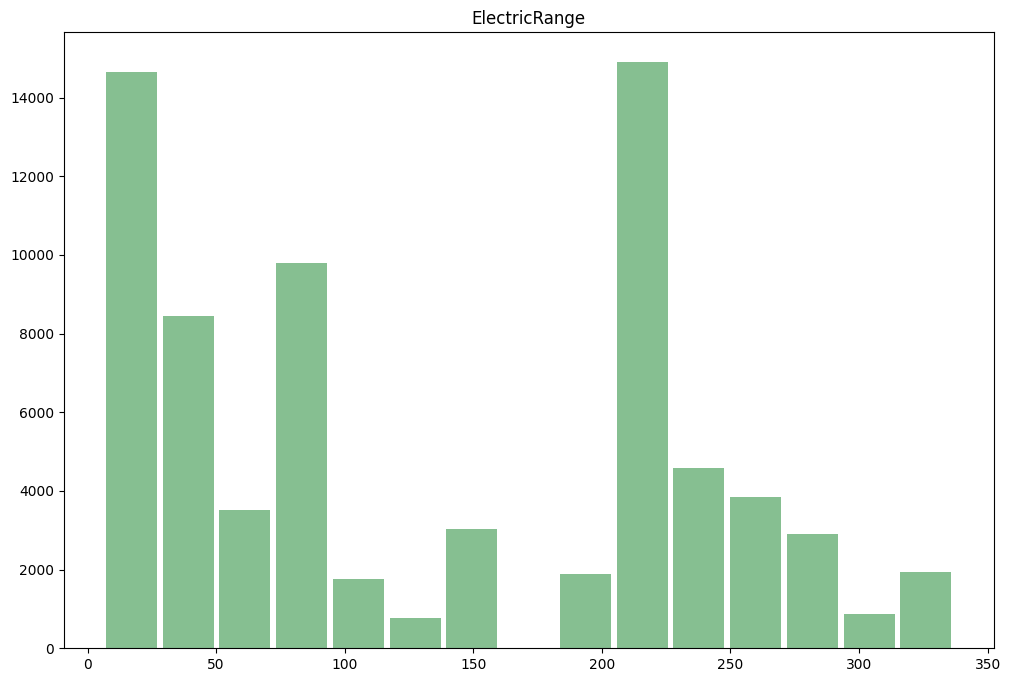

In [109]:
data_cars = data_cars.drop(data_cars[data_cars.ElectricRange == 0].index)
data_cars.hist(column='ElectricRange', bins=15, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
# Histogram zasiegu samochodow bez 0

In [110]:
data_cars.VIN.unique().size
# Ilosc unikalnych samochodow (po numerze VIN):

5655

In [111]:
data_cars.ModelYear.min()
# Najstarsze samochody elektryczne w tej tabeli sa z roku:

1997

In [112]:
data_cars.loc[(data_cars.ModelYear == data_cars.ModelYear.min())].head(1)[['ModelYear', 'Make', 'Model', 'ElectricVehicleType', 'CleanAlternativeFuelVehicleEligibility', 'ElectricRange']]
#informacje o najstarszym samochodzie

,ModelYear,Make,Model,ElectricVehicleType,CleanAlternativeFuelVehicleEligibility,ElectricRange
72561,1997,CHEVROLET,S-10 PICKUP,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,39


In [113]:
data_cars_model_unique = data_cars.drop_duplicates(subset=['Make', 'Model'], keep='first')
data_cars_model_unique.loc[(data_cars.ModelYear == data_cars.ModelYear.max()) & (data_cars.ElectricRange>0)].head(1)[['ModelYear', 'Make', 'Model', 'ElectricVehicleType', 'CleanAlternativeFuelVehicleEligibility', 'ElectricRange']]
#informacje o najmlodszym samochodzie 

,ModelYear,Make,Model,ElectricVehicleType,CleanAlternativeFuelVehicleEligibility,ElectricRange
212,2023,KIA,SPORTAGE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,34


In [114]:
cars_range = data_cars.sort_values('ElectricRange', ascending=False)
cars_range = cars_range.drop_duplicates(subset=['Make', 'Model'], keep='first')
cars_range.head(20)[['Make', 'Model', 'ModelYear', 'ElectricRange']]
# samochody z najwiekszymi zakresami

,Make,Model,ModelYear,ElectricRange
50515,TESLA,MODEL S,2020,337
13184,TESLA,MODEL 3,2020,322
54413,TESLA,MODEL X,2020,293
102114,TESLA,MODEL Y,2020,291
76334,CHEVROLET,BOLT EV,2020,259
8675,HYUNDAI,KONA,2020,258
11450,TESLA,ROADSTER,2010,245
95473,KIA,NIRO,2020,239
92890,JAGUAR,I-PACE,2019,234
99765,POLESTAR,PS2,2021,233


In [115]:
group = cars_range.groupby(['Make', 'Model'])[["ModelYear", "ElectricRange"]].sum()
group
# pogrupowanie samochodow na marki

ModelYear  ElectricRange
Make  Model                                     
AUDI  A3                     2017             16
      A7                     2021             24
      A8 E                   2020             17
      E-TRON                 2021            222
      E-TRON SPORTBACK       2021            218
...                           ...            ...
VOLVO S60                    2022             41
      S90                    2018             21
      V60                    2022             41
      XC60                   2022             35
      XC90                   2022             35

[89 rows x 2 columns]